Name : Oindrilla Banerjee

**Data Description**

---



---



**Features:**

employee_id: Unique ID for employee column has been removed as it does not have any effect to the accuracy of our model.


*   department: Department of employee
*   region: Region of employment (unordered)
*   education: Education Level
*   gender: Gender of Employee
*   recruitment_channel: Channel of recruitment for employee
*   no_of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
*   age: Age of Employee
*   previous_ year_ rating: Employee Rating for the previous year
*   length_of_ service: Length of service in years
*   awards_ won: if awards won during previous year then 1 else 0
*   avg_ training_ score: Average score in current training evaluations
*   is_promoted: (Target variable)  for promotion








**DATA PREPROCESSING**

> We perform some data proprocessing on the train and test data sets such as: 
1. Dropping rows which contain NA values. (Since our data set is large, this did not affect us.)
2. Dropping columns which add nothing to our model accuracy such as Employee IDs.


*   (NOTE: The above changes have been made **directly into the Excel file** using the "Filter" option to save time and make the data preprocessing convenient. The uploaded csv files are thereby the preprocessed ones.)






In [1]:
# Importing numpy, pandas and matplotlib libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data sets from the .csv files
emp_train = pd.read_csv('train_DPhi.csv')
emp_test = pd.read_csv('test_DPhi.csv')


In [3]:
emp_train["department"].value_counts()

Sales & Marketing    14239
Operations           10547
Procurement           6641
Technology            6502
Analytics             4610
Finance               2219
HR                    2142
R&D                    893
Legal                  867
Name: department, dtype: int64

In [4]:
emp_test["department"].value_counts()

Sales & Marketing    6176
Operations           4434
Procurement          2804
Technology           2725
Analytics            1960
Finance               974
HR                    972
R&D                   391
Legal                 383
Name: department, dtype: int64

In [5]:
# checking training data set info
emp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            48660 non-null  object
 1   region                48660 non-null  object
 2   education             48660 non-null  object
 3   gender                48660 non-null  object
 4   recruitment_channel   48660 non-null  object
 5   no_of_trainings       48660 non-null  int64 
 6   age                   48660 non-null  int64 
 7   previous_year_rating  48660 non-null  int64 
 8   length_of_service     48660 non-null  int64 
 9   awards_won?           48660 non-null  int64 
 10  avg_training_score    48660 non-null  int64 
 11  is_promoted           48660 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.5+ MB


In [6]:
# checking testing data set info
emp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            20819 non-null  object
 1   region                20819 non-null  object
 2   education             20819 non-null  object
 3   gender                20819 non-null  object
 4   recruitment_channel   20819 non-null  object
 5   no_of_trainings       20819 non-null  int64 
 6   age                   20819 non-null  int64 
 7   previous_year_rating  20819 non-null  int64 
 8   length_of_service     20819 non-null  int64 
 9   awards_won?           20819 non-null  int64 
 10  avg_training_score    20819 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.7+ MB


In [7]:
# finding correlation matrix of numerical columns in training data set
emp_train.corr()

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.083590,-0.064236,-0.055440,-0.008528,0.042033,-0.025006
age,-0.083590,1.000000,0.005068,0.620348,-0.010335,-0.066214,-0.022412
previous_year_rating,-0.064236,0.005068,1.000000,-0.001252,0.027920,0.070041,0.158715
length_of_service,-0.055440,0.620348,-0.001252,1.000000,-0.043750,-0.047461,-0.014267
awards_won?,-0.008528,-0.010335,0.027920,-0.043750,1.000000,0.073132,0.196971
avg_training_score,0.042033,-0.066214,0.070041,-0.047461,0.073132,1.000000,0.179494
is_promoted,-0.025006,-0.022412,0.158715,-0.014267,0.196971,0.179494,1.000000


**DATA VISUALIZATION**

---



In [8]:
# importing seaborn library for visualization
import seaborn as sns

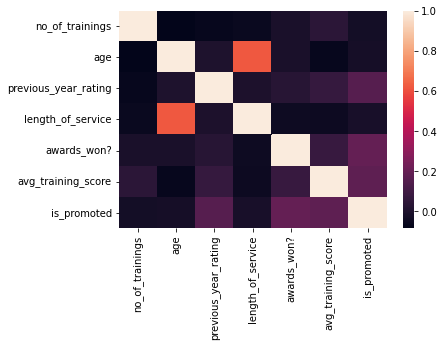

In [9]:
# heatmap of correlation matrix
sns.heatmap(emp_train.corr())

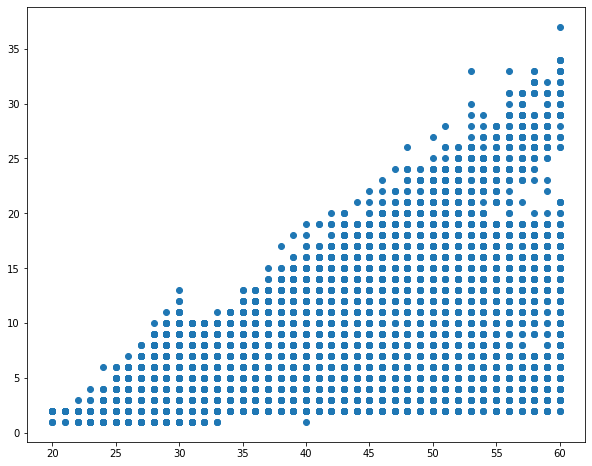

In [10]:
# scatter plot of age vs length of service
plt.figure(figsize= (10, 8))
plt.scatter(emp_train.age, emp_train.length_of_service)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Employees')

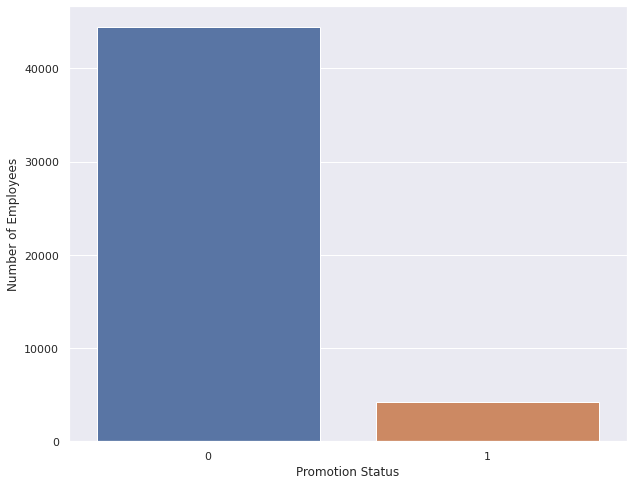

In [11]:
# creating the countplot of the target values i.e., the two classes.
sns.set_theme(style= 'darkgrid')
plt.figure(figsize=(10, 8))
sns.countplot(emp_train.is_promoted)
plt.xlabel("Promotion Status")
plt.ylabel("Number of Employees")

**Observation**: We see that the dataset has a considerably higher amount of 0 values, indicating that the data
has more rows that represent employees who did not achieve promotion. In other words, the data is biased.


Next, we shall **Label Encode** the dataset so that it transforms the categorical values into numerical value so that the model can be trained.


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [13]:
cat_cols = ["department", "region", "education", "gender", "recruitment_channel"]

In [14]:
for col in cat_cols:
 emp_train[col] = le.fit_transform(emp_train[col])
 emp_test[col] = le.fit_transform(emp_test[col])

In [15]:
emp_train

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,1,35,5,8,0,49,0
1,4,14,0,1,0,1,30,5,4,0,60,0
2,7,10,0,1,2,1,34,3,7,0,50,0
3,7,15,0,1,0,2,39,1,10,0,50,0
4,8,18,0,1,0,1,45,3,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48655,7,5,0,1,0,2,31,1,2,0,49,0
48656,8,5,0,1,2,1,48,3,17,0,78,0
48657,4,19,2,0,0,1,37,2,6,0,56,0
48658,0,0,0,1,0,1,27,5,3,0,79,0


In [16]:
emp_test

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,2,28,0,0,0,1,31,3,5,0,51
1,7,4,0,1,0,1,31,1,4,0,47
2,5,11,0,0,0,3,31,2,9,0,65
3,1,21,0,1,2,1,30,4,7,0,61
4,5,31,0,1,2,1,36,3,2,0,68
...,...,...,...,...,...,...,...,...,...,...,...
20814,7,12,0,1,0,1,28,4,2,0,51
20815,3,11,1,1,2,1,24,3,1,0,61
20816,8,17,0,1,2,1,31,3,7,0,74
20817,2,7,0,0,2,1,26,4,4,0,50


SPLIT THE DATASET INTO TRAINING AND TEST SET

---



---



In [17]:
x = emp_train.drop("is_promoted", axis = 1)
y = emp_train["is_promoted"]

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [19]:
x_train.shape

(34062, 11)

In [20]:
# reshaping the y_train variable
y_train = np.array(y_train).reshape(-1, 1)
y_train.shape

(34062, 1)

In [21]:
# we use ravel to convert our y_train into one array of 0s and 1s.
y_train = np.ravel(y_train)


In [22]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
y_test = np.ravel(y_test)

In [24]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
emp_test.shape

(20819, 11)

In order to prevent data leakage we shall use Normalization

In [26]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [27]:
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)
emp_test = scalar.transform(emp_test)

Testing the performance on the test dataset

RANDOM FOREST CLASSIFICATION

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier()

In [29]:
rfor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
y_pred_rf = rfor .predict(x_test)

In [31]:
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0])

In [32]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

In [33]:
confusion_matrix(y_test, y_pred_rf)

array([[13243,    62],
       [  967,   326]])

In [34]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     13305
           1       0.84      0.25      0.39      1293

    accuracy                           0.93     14598
   macro avg       0.89      0.62      0.68     14598
weighted avg       0.92      0.93      0.91     14598



In [35]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_rf)

In [36]:
print('roc_auc_score for Random Forest model: ', roc_auc_score(y_test, y_pred_rf))

roc_auc_score for Random Forest model:  0.6237334672606202


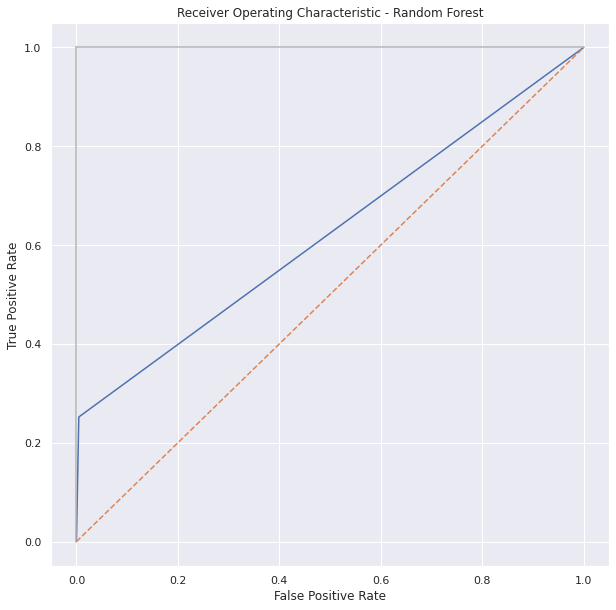

In [37]:
# PLOTTING THE ROC curve
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random Forest')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier()


In [39]:
rfor.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
y_pred_rf

array([0, 0, 1, ..., 0, 0, 0])

Scores for Random Forest model
 
*   Accuracy: 0.93
*   Precision: 0.93
 








DECISION TREE CLASSSIFIER

---



---



In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()


In [42]:
tree.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [43]:
y_pred_tree = tree.predict(x_test)

In [44]:
y_pred_tree

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

In [46]:
print(classification_report(y_test,y_pred_tree))


              precision    recall  f1-score   support

           0       0.94      0.93      0.93     13305
           1       0.35      0.41      0.37      1293

    accuracy                           0.88     14598
   macro avg       0.64      0.67      0.65     14598
weighted avg       0.89      0.88      0.88     14598



In [47]:
confusion_matrix(y_test, y_pred_tree)

array([[12311,   994],
       [  769,   524]])

Scores for Decision Tree model


1.   Accuracy: 0.88 
2.   Precision: 0.94
3.   Recall: 0.93
4.   F1 Score: 0.93






In [48]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_tree)

In [49]:
print('roc_auc_score for Decision tree Model: ', roc_auc_score(y_test, y_pred_tree))

roc_auc_score for Decision tree Model:  0.6652751656434657


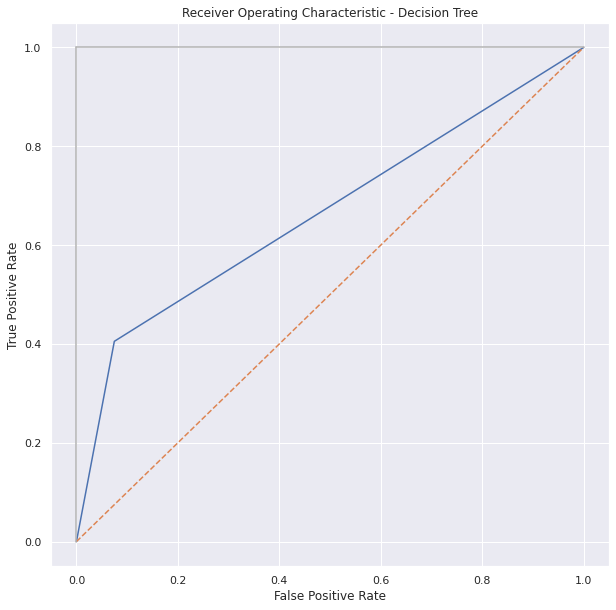

In [50]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Decision Tree')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

LOGISTIC REGRESSION

---



---





In [51]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()


In [52]:
log_reg.fit(x_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
log_reg.coef_

array([[ 0.58937198,  0.06917208,  0.25758813, -0.08549369,  0.00755579,
        -1.53208468, -0.76281697,  2.10687189,  0.51127388,  2.05395643,
         2.72319113]])

In [55]:
log_reg.intercept_


array([-5.29327393])

In [56]:
y_pred_lr = log_reg.predict(x_test)

In [57]:
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

In [59]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     13305
           1       0.73      0.08      0.14      1293

    accuracy                           0.92     14598
   macro avg       0.83      0.54      0.55     14598
weighted avg       0.90      0.92      0.88     14598



In [60]:
confusion_matrix(y_test, y_pred_lr)


array([[13270,    35],
       [ 1196,    97]])

In [61]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr)

In [62]:
print('roc_auc_score for Logistic Regression Model: ', roc_auc_score(y_test, y_pred_lr))

roc_auc_score for Logistic Regression Model:  0.5361943724381829


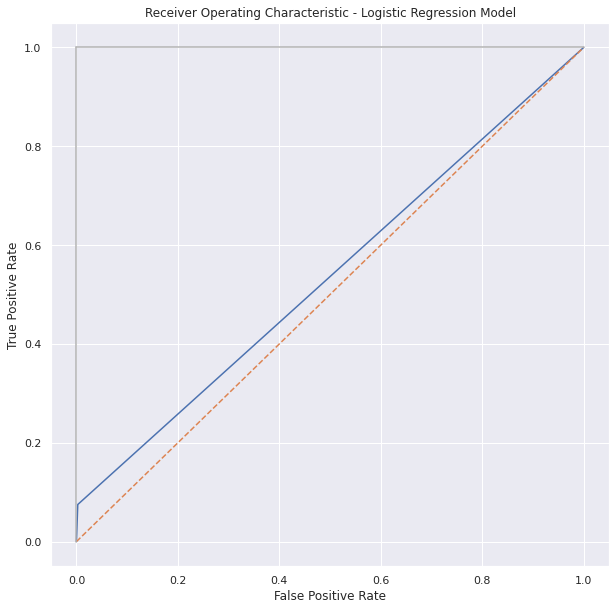

In [63]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression Model')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We find that the AUC for the Decision Tree model is the highest among all the 3 models we considered. 
But the accuracy scores are highest for the Random Forest model.
As a result of that, we will use Random Forest model for our emp_test data set to maximize accuracy.
